# ex09-Inundation Estimation using Rapid Flood Spilling Method

Flooding is a global phenomenon that causes casualties and property loss on every inhabited continent. It is probably the most devastating, widespread and frequent natural disaster for human societies. Flood inundation models are therefore developed to understand, assess and predict flood events and their impact (Teng et al., 2017). 

This notebook will show you how to idenfity flood risks based on from a Digital Elevation Model (DEM) and the Rapid Flood Spilling Method (RFSM) provided by the python package of pysheds. [Pysheds](https://www.hatarilabs.com/ih-en/elevation-model-conditioning-and-stream-network-delimitation-with-python-and-pysheds-tutorial) is a Python 3 package designed for watershed delimitation and stream network extraction.

In [1]:
%matplotlib inline

import numpy as np
from pysheds.rfsm import RFSM
from pysheds.grid import Grid

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

import warnings
warnings.filterwarnings("ignore")

## Load and preprocess DEM

It is important to use a DEM with no ***depressions*** or ***sinks***. A sink is a cell that does not have an associated drainage value. Drainage values indicate the direction that water will flow out of the cell, and are assigned during the process of creating a flow direction grid for the landscape. The resulting drainage network depends on finding the ‘flow path’ of every cell in the grid, so it is important that the fill step is performed prior to creating a flow direction grid.

Two preprocessing tasks include:
- Detect and fill depressions
- Detect and resolve flats

In [2]:
grid = Grid.from_raster('data/FloodFill/roi.tif', data_name='dem')
grid.fill_depressions(data='dem', out_name='flooded_dem')
grid.resolve_flats('flooded_dem', out_name='inflated_dem')
grid.clip_to('dem')
dem  = grid.view('inflated_dem')

## Estimate Inundation with RFSM

If you are interested in RFSM, refer to the source code at https://github.com/mdbartos/pysheds/blob/master/pysheds/rfsm.py

*When your DEM is too big, it is time-consuming to create an instance of RFSM(dem) and hard to converge in rfsm.compute_waterlevel() only using the default iteratin number of 100 for the optimization method of scipy.bisect.*

***Generate RFSM data structure***

In [3]:
rfsm = RFSM(dem)

***Apply RFSM with 1.2 meters of uniformly distributed water just for demo***.

In [4]:
rfsm.reset_volumes()
cell_area  = np.abs(grid.affine.a * grid.affine.e) # should with projection better in unit of meter
input_vol  = 1.2*cell_area * np.ones(dem.shape)
waterlevel = rfsm.compute_waterlevel(input_vol)

## Visualize in 3D

(-3.45, 72.45, -4.95, 103.95)

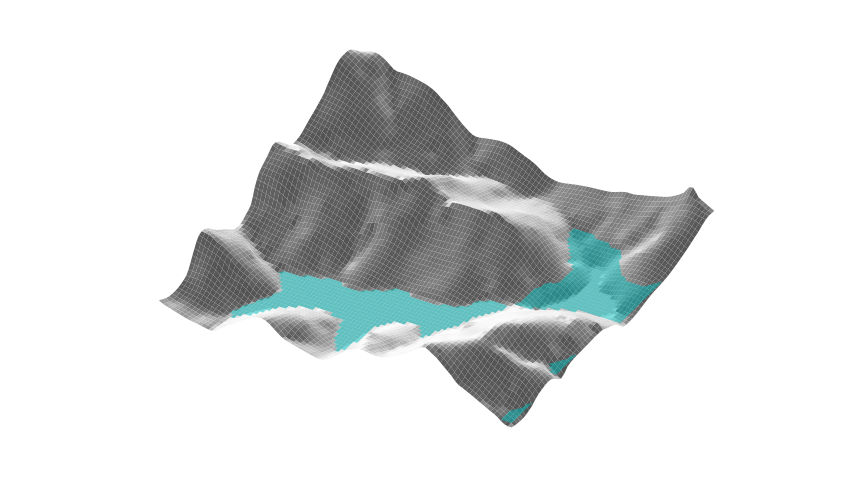

In [11]:
fig = plt.figure(figsize=(15, 9))
ax  = fig.gca(projection='3d')
plt.gca().patch.set_facecolor('white')

# Make data.
X = np.arange(dem.shape[1])
Y = np.arange(dem.shape[0])
X, Y = np.meshgrid(X, Y)
w = np.where(waterlevel, waterlevel, np.nan)
w.flat[0] = np.nan

# Plot the surface.
surf1 = ax.plot_surface(X, Y, dem, 
                        rstride=1, cstride=1,                         
                        color='0.99', 
                        antialiased=True, 
                        edgecolor='none')
# Plot water
surf2 = ax.plot_surface(X, Y, w,   
                        rstride=1, cstride=1, 
                        color='c',    
                        antialiased=True, 
                        alpha=0.5, shade=False)

ax.view_init(70, 30)
plt.axis('off')

## References

Teng J, Jakeman A J, Vaze J, et al. Flood inundation modelling: A review of methods, recent advances and uncertainty analysis. Environ Model Softw, 2017, 90: 201-216

Travis E, Oliphant. A guide to NumPy, USA: Trelgol Publishing, (2006).

Stéfan van der Walt, S. Chris Colbert and Gaël Varoquaux. The NumPy Array: A Structure for Efficient Numerical Computation, Computing in Science & Engineering, 13, 22-30 (2011), DOI:10.1109/MCSE.2011.37

Fernando Pérez and Brian E. Granger. IPython: A System for Interactive Scientific Computing, Computing in Science & Engineering, 9, 21-29 (2007), DOI:10.1109/MCSE.2007.53

John D. Hunter. Matplotlib: A 2D Graphics Environment, Computing in Science & Engineering, 9, 90-95 (2007), DOI:10.1109/MCSE.2007.55

https://seaborn.pydata.org/introduction.html

https://www.hatarilabs.com/ih-en/elevation-model-conditioning-and-stream-network-delimitation-with-python-and-pysheds-tutorial